In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

'''PCA를 하는 과정 : data의 분포가 되어 있을 때 data의 eigen value, vector를 찾고 주축으로 data의 변형을 하는 것.
1. 정규화를 해준다.
2. 정규화된 data에서 covariance matrix를 구한다.
3. covariance matrix를 이용하여 eigen vector, eigenvalue를 구한다. np.linalg.eig(cov) -> eigenvalues, eigenvectors
4. 내림차순으로 eigenvalue와 vector를 sort해야한다. -> 중요한 vector를 맨앞에 둔다.
5. PCA_data는 eigenvector와 정규화된 data가 행렬곱을 했을 때 나타난다. 
6. Invert하는 과정 : original data = PCA_data * eigenvector.T + mean
'''

'PCA를 하는 과정 : data의 분포가 되어 있을 때 data의 eigen value, vector를 찾고 주축으로 data의 변형을 하는 것.\n1. 정규화를 해준다.\n2. 정규화된 data에서 covariance matrix를 구한다.\n3. covariance matrix를 이용하여 eigen vector, eigenvalue를 구한다. np.linalg.eig(cov) -> eigenvalues, eigenvectors\n4. 내림차순으로 eigenvalue와 vector를 sort해야한다. -> 중요한 vector를 맨앞에 둔다.\n5. PCA_data는 eigenvector와 정규화된 data가 행렬곱을 했을 때 나타난다. \n6. Invert하는 과정 : original data = PCA_data * eigenvector.T + mean\n'

In [2]:
#Create random 2d data
mu = np.array([10,13]) #평균값을 만들어 준다. 
sigma = np.array([[3.5,-1.8], [-1.8,3.5]]) #공분산 행렬, x와 y부호가 (-)이기 때문에 두 개의 다른 변화

#2차원 데이터 출력
print("Mu ", mu.shape)
print("Sigma ", sigma.shape)

#Create 1000 samples using mean and sigma 2차원 데이터
org_data = rnd.multivariate_normal(mu,sigma,size=(1000))
print("Data shape ", org_data.shape)

Mu  (2,)
Sigma  (2, 2)
Data shape  (1000, 2)


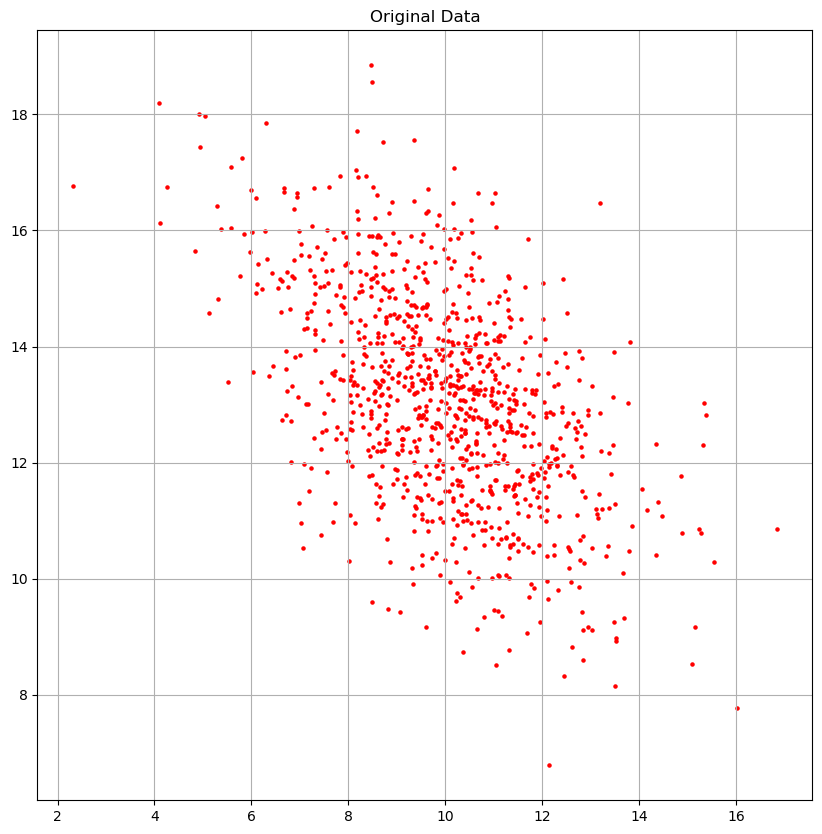

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(org_data[:,0], org_data[:,1],s=5,color='red')
plt.title('Original Data')
plt.grid()
plt.show()

In [4]:
#Step 2 mean centering / Normalize data -> data를 0,0을 기준으로 한다.
#Subtract mean from data
mean = np.mean(org_data,axis = 0)
#print(mean) 평균을 10,13으로 잡아서 그 근처로 둔다음
print("Mean ", mean.shape) 
mean_data = org_data - mean #평균을 빼면 0아니면 음수, 양수로 맵핑이 된다.
print("Data after subtraction mean ", org_data.shape,"\n")
print("Mean_data ", mean_data.shape)

Mean  (2,)
Data after subtraction mean  (1000, 2) 

Mean_data  (1000, 2)


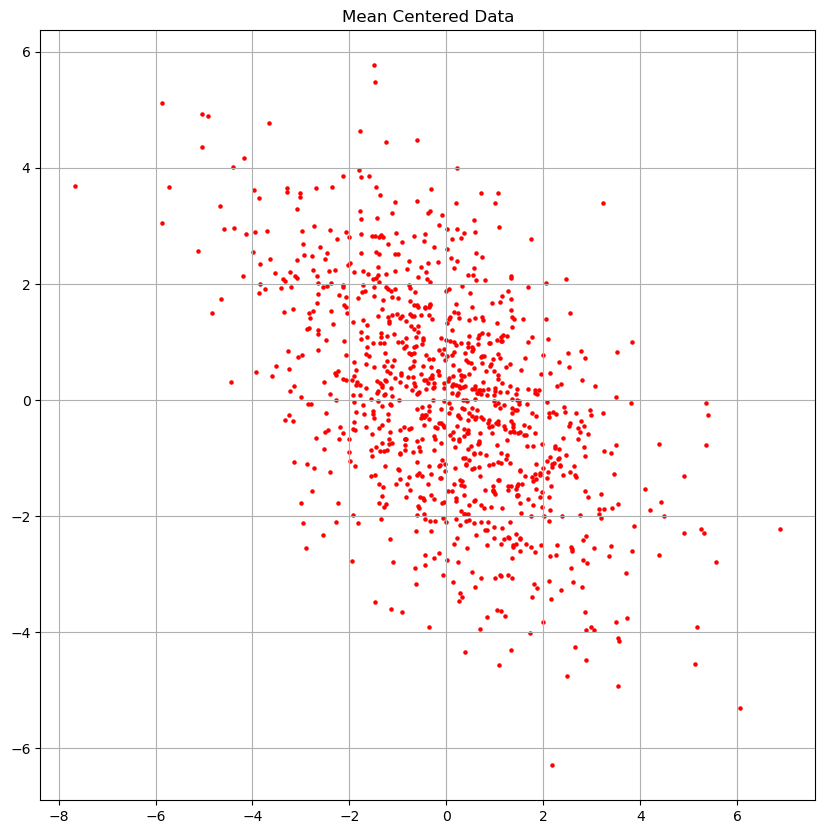

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(mean_data[:,0], mean_data[:,1],s=5,color='red')
plt.title('Mean Centered Data')
plt.grid()
plt.show()

In [6]:
#Step 3. Compute the covariance matrix
#Eigenvector, Eigenvalue값을 가지는 것이다.
print(mean_data.T)#1000,2 data를 Transpose한 것.
cov = np.cov(mean_data.T) #mean_data를 transpose하고
cov = np.round(cov,2) #반올림하는 method round 소수점 둘째자리까지 cov데이터를 반올림
print("Covariance matrix ", cov.shape, "\n")
print(cov)
#공분산 cov shape가 2x2가 나오는 이유는 1000,2 -> Transpose -> 2,1000
#따라서 공분산 행렬은 각 열에 해당하는 변수에 해당하기 때문에 2x2가 나온다.
#두번 째 변수에 대한 분산과 공분산을 나타낸다.

[[-4.16637401 -1.4209384  -2.64935091 ...  1.33811216  0.94259858
   0.95502615]
 [ 4.17610923 -0.01862403  1.82752925 ...  1.73334142  1.66514112
  -1.56693328]]
Covariance matrix  (2, 2) 

[[ 3.58 -1.79]
 [-1.79  3.37]]


In [7]:
#Step 4 Compute eigen vectors of the covariance matrix -> covariance matrix를 가지고 vector구하기
eig_val, eig_vec = np.linalg.eig(cov) #벡터와 value 매칭
print("Eigen vectors ", eig_vec)
print("Eigen values ", eig_val,'\n')

Eigen vectors  [[ 0.72751583  0.6860909 ]
 [-0.6860909   0.72751583]]
Eigen values  [5.26807696 1.68192304] 



In [8]:
#Sort eigen values and corresponding eigen vectors in descending order 
#내림차순으로 eigen vector에 맞게 eigen value를 분류하자 -> 더 큰 영향을 주는 주축을 찾는 것이다.
indices = np.arange(0,len(eig_val),1)
print(indices)
indices = ([x for _,x in sorted(zip(eig_val,indices))])[::-1]
#indices = eig_val.agsort()[::-1]
#eig_val = eig_val(indices)
#eig_vec = eig_vec(:,indices)

eig_val = eig_val[indices]
eig_vec=eig_vec[:,indices]
print("sorted Eigen vectors ", eig_vec)
print("sorted Eigen values ", eig_val,"\n")

[0 1]
sorted Eigen vectors  [[ 0.72751583  0.6860909 ]
 [-0.6860909   0.72751583]]
sorted Eigen values  [5.26807696 1.68192304] 



In [9]:
#Step 5 Compute the explained variacne and select N Components
#각각이 feature에 맞게 variance를 계산하고 최적의 eigenvector K개를 고른다.
#Get explained variance
#eigenvalue들이 퍼져있는 공분산 즉 어떤 중요도가 있는 지 어떻게 퍼져있는 지 나타내는 것이다.
sum_eig_val = np.sum(eig_val)
explained_variance = eig_val/sum_eig_val
print(explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[0.75799669 0.24200331]
[0.75799669 1.        ]


Transformed data  (1000, 2)


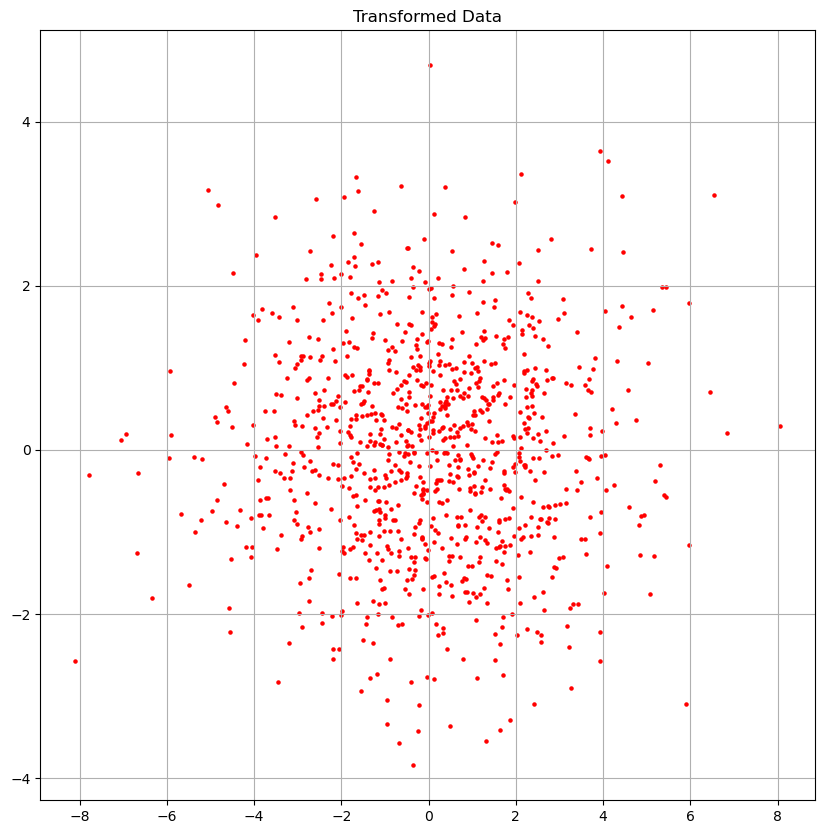

In [10]:
#Step 6 Transform Data Using eigen vectors
#Take transpose of Eigen vectors with data
pca_data = np.dot(mean_data, eig_vec)#제곱을 해준다
print("Transformed data ", pca_data.shape)

plt.figure(figsize=(10,10))
plt.scatter(pca_data[:,0], pca_data[:,1],s=5,color='red')
plt.title('Transformed Data')
plt.grid()
plt.show()

In [11]:
#Invert PCA and Reconstruct original data
#PCA를 한 데이터를 통해 original data를 구하는 것이다.
#recon_data = PCA_data.dot(eigenvector.T) + mean
recon_data = pca_data.dot(eig_vec.T) + mean
print(recon_data.shape)

(1000, 2)


In [12]:
PinvP = np.linalg.inv(eig_vec) @eig_vec
PtrsP = eig_vec.T @eig_vec

print("P-inv @ P :\n", np.round(PinvP,2))
print("P-transpose @ P\n", np.round(PtrsP,2))


P-inv @ P :
 [[ 1.  0.]
 [-0.  1.]]
P-transpose @ P
 [[ 1. -0.]
 [-0.  1.]]


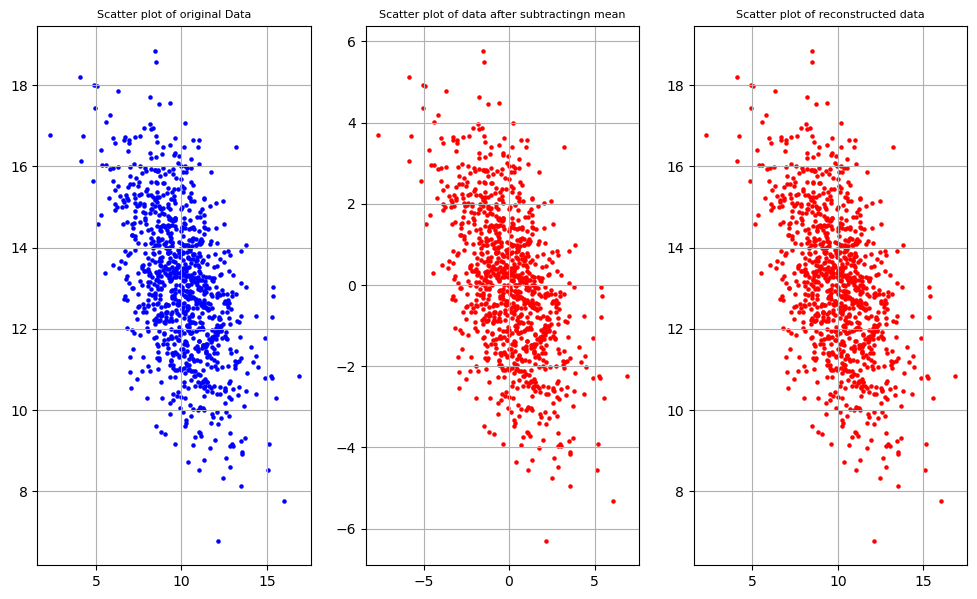

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(12, 7))
ax[0].scatter(org_data[:, 0], org_data[:, 1], s=5, color='blue')
ax[0].set_title("Scatter plot of original Data", fontsize=8)
ax[0].grid(True)

ax[1].scatter(mean_data[:, 0], mean_data[:, 1], s=5, color='red')
ax[1].set_title("Scatter plot of data after subtractingn mean", fontsize=8)
ax[1].grid(True)

ax[2].scatter(recon_data[:, 0], recon_data[:, 1], s=5, color='red')
ax[2].set_title("Scatter plot of reconstructed data", fontsize=8)
ax[2].grid(True)
plt.show()

In [14]:
loss = np.mean(np.square(recon_data - org_data))
print("Reconstruction loss ", loss)

Reconstruction loss  7.888609052210118e-33
